In [1]:
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
pclass_v=df['Pclass'].value_counts()
pclass_v

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

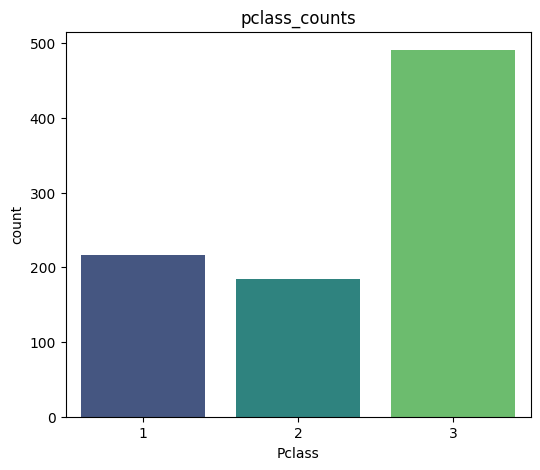

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.barplot(x=pclass_v.index,y=pclass_v.values,palette='viridis')
plt.title('pclass_counts')
plt.ylabel('count')
plt.xlabel('Pclass')
plt.show()

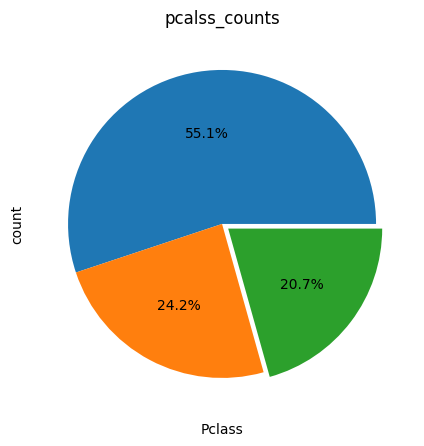

In [10]:
plt.figure(figsize=(6,5))
plt.pie(pclass_v.values,autopct='%1.1f%%',explode=(0.0,0.0,0.05))
plt.title('pcalss_counts')
plt.ylabel('count')
plt.xlabel('Pclass')
plt.show()

In [11]:
sexv=df['Sex'].value_counts()
sexv

Sex
male      577
female    314
Name: count, dtype: int64

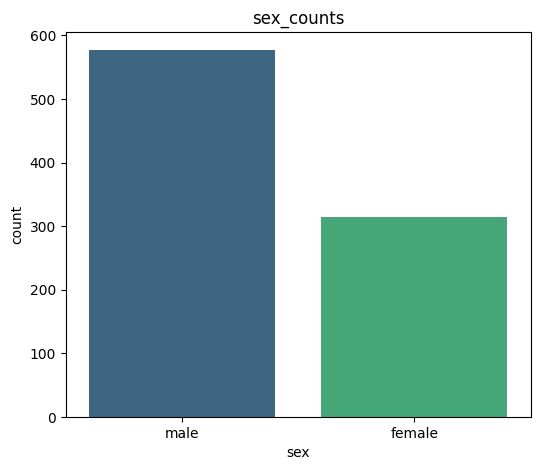

In [12]:
plt.figure(figsize=(6,5))
sns.barplot(x=sexv.index,y=sexv.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

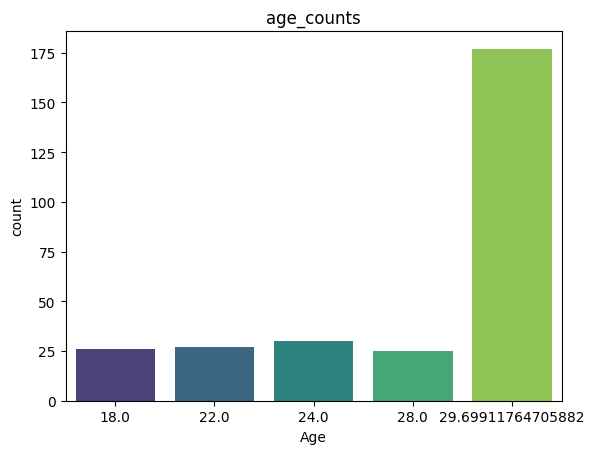

In [13]:
agev=df['Age'].value_counts().head()
sns.barplot(x=agev.index,y=agev.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

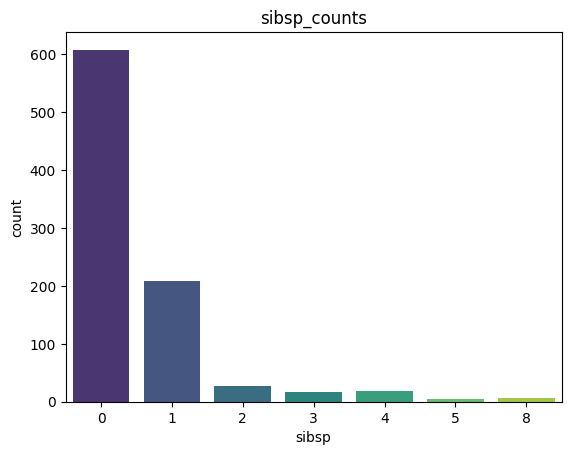

In [14]:
SibSpv=df['SibSp'].value_counts()
sns.barplot(x=SibSpv.index,y=SibSpv.values,palette='viridis')
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

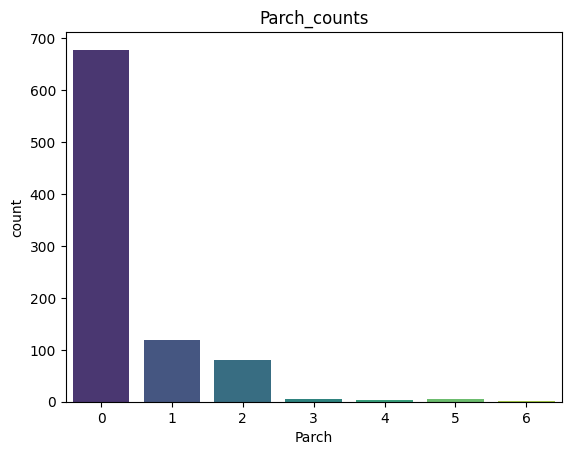

In [15]:
Parchv=df['Parch'].value_counts()
sns.barplot(x=Parchv.index,y=Parchv.values,palette='viridis')
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

In [16]:
Embarkedv=df['Embarked'].value_counts()
Embarkedv

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

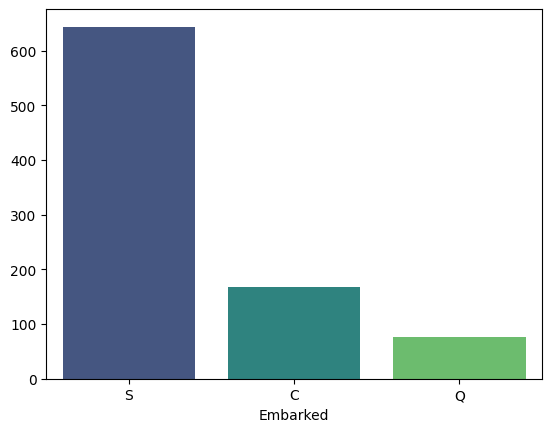

In [17]:
sns.barplot(x=Embarkedv.index,y=Embarkedv.values,palette='viridis')
plt.show()

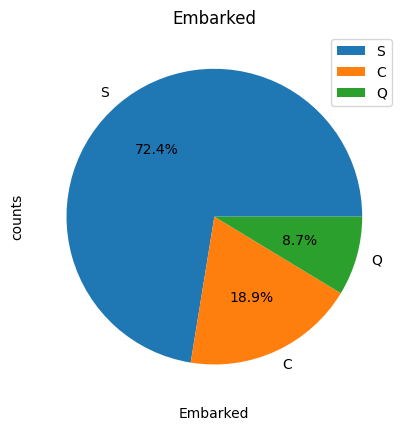

In [18]:
Embarkedv.plot(kind='pie',autopct='%1.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked')
plt.ylabel('counts')
plt.legend(labels=Embarkedv.index)
plt.show()

In [19]:
Survivedv=df['Survived'].value_counts()
Survivedv

Survived
0    549
1    342
Name: count, dtype: int64

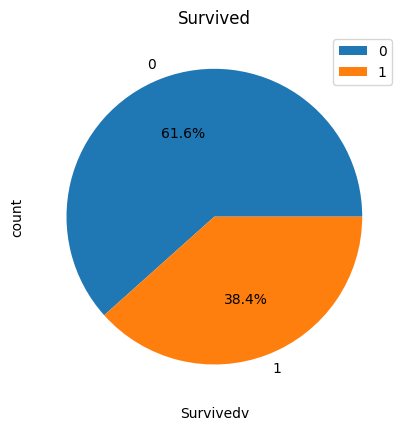

In [20]:
Survivedv.plot(kind='pie',autopct='%1.1f%%')
plt.title('Survived')
plt.xlabel('Survivedv')
plt.ylabel('count')
plt.legend(labels=Survivedv.index,loc='best')
plt.show()

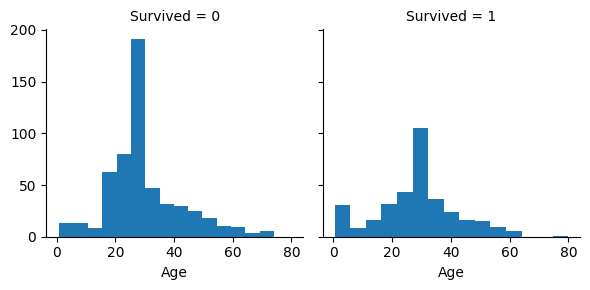

In [23]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=15)
plt.show()

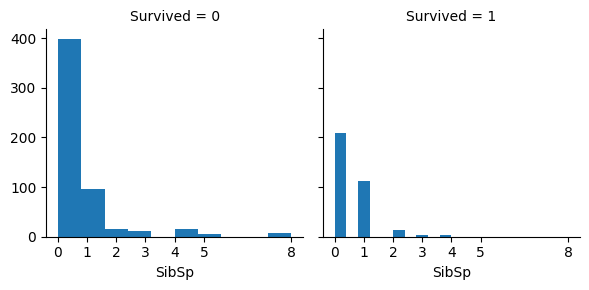

In [27]:
age=sns.FacetGrid(df,col='Survived')
plt.xticks(df['SibSp'].value_counts().index)
age.map(plt.hist,'SibSp')
plt.show()

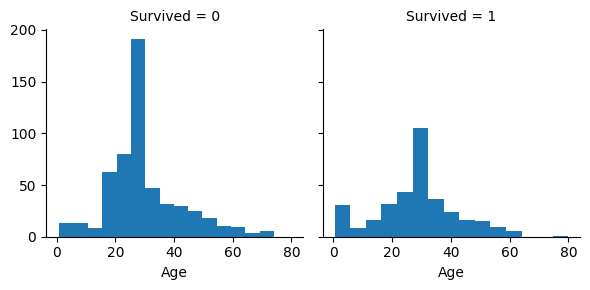

In [28]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=15)
plt.show()

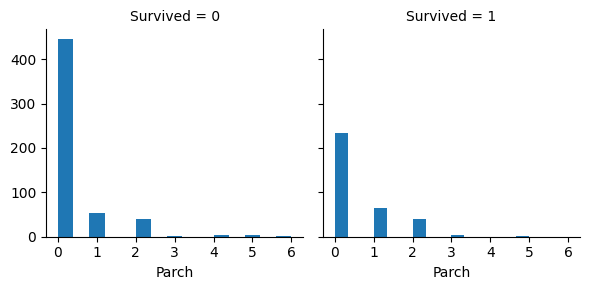

In [29]:
age=sns.FacetGrid(df,col='Survived')
plt.xticks(df['Parch'].value_counts().index)
age.map(plt.hist,'Parch',bins=15)
plt.show()

In [30]:
df=df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [34]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [36]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [42]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

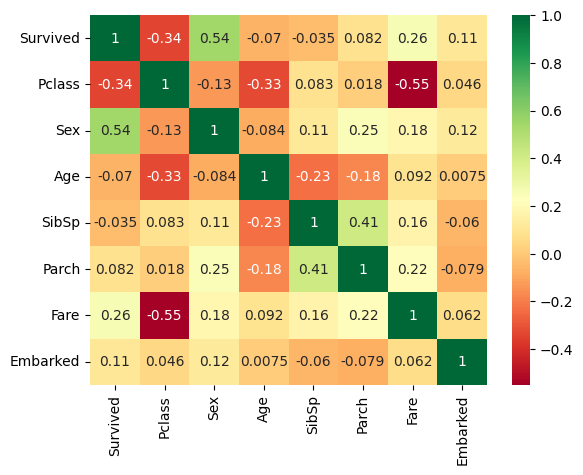

In [46]:
df['Sex'].replace({'male':1,'female':2},inplace=True)
df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [47]:
x=df.drop('Embarked',axis=1)
y=df['Embarked']

In [48]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.tree import  DecisionTreeClassifier

In [63]:
dtf=DecisionTreeClassifier()
dtf.fit(x_train,y_train)
yhat=dtf.predict(x_test)

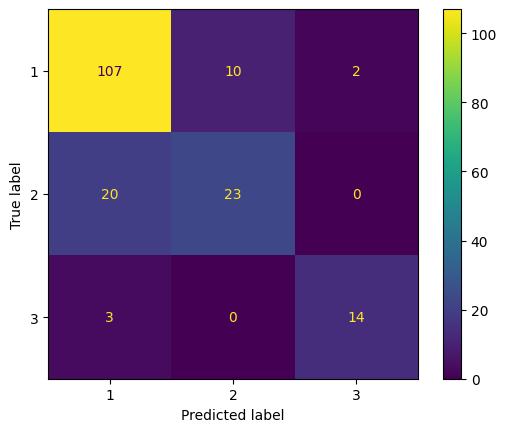

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,r2_score
ConfusionMatrixDisplay.from_predictions(y_test, yhat)

In [66]:
df['Embarked'].value_counts()

TypeError: 'DecisionTreeClassifier' object is not subscriptable

In [68]:
dtf.score(x_train,y_train)

0.9957865168539326

In [59]:
print('accuracy_score: ',accuracy_score(y_test,yhat))

accuracy_score:  0.8044692737430168
